In [3]:
import numpy as np
import matplotlib.pyplot as plt
from process_images import *
from numpy_to_pandas import numpy_to_pandas_dataset

In [4]:
data = np.load("processed_dataset.npz")
df = numpy_to_pandas_dataset("processed_dataset.npz")
df.columns

Index(['pixel_00000', 'pixel_00001', 'pixel_00002', 'pixel_00003',
       'pixel_00004', 'pixel_00005', 'pixel_00006', 'pixel_00007',
       'pixel_00008', 'pixel_00009',
       ...
       'pixel_16375', 'pixel_16376', 'pixel_16377', 'pixel_16378',
       'pixel_16379', 'pixel_16380', 'pixel_16381', 'pixel_16382',
       'pixel_16383', 'label'],
      dtype='object', length=16385)

Ahora tenemos en df un DataFrame con las siguientes columnas:
- pixel_00000 - pixel_16383: 16384 (128x128) columnas, una para cada pixel, con un valor 0-255 de la escala de grises
- label: 0 si es Healthy, 1 si es Parkinson

In [5]:
# Dividimos el dataset en datos de entrenamiento y datos de test (80/20) - SIN SKLEARN

# Separar features (píxeles) y target (label)
X = df.drop('label', axis=1).values  # Convertir a numpy array
y = df['label'].values               # Convertir a numpy array

# Configuración del split
test_size = 0.2
random_state = 42
np.random.seed(random_state)  # Para reproducibilidad

# Obtener índices aleatorios
n_samples = len(X)
n_test = int(n_samples * test_size)
indices = np.random.permutation(n_samples)

# Dividir índices
test_indices = indices[:n_test]
train_indices = indices[n_test:]

# Crear splits
X_train = X[train_indices]
X_test = X[test_indices]
y_train = y[train_indices]
y_test = y[test_indices]

print(f"Dataset completo: {len(X)} muestras")
print(f"Train set: {len(X_train)} muestras ({len(X_train)/len(X)*100:.1f}%)")
print(f"Test set: {len(X_test)} muestras ({len(X_test)/len(X)*100:.1f}%)")
print(f"\nDistribución de clases en train:")
print(f"  - Healthy (0): {np.sum(y_train == 0)}")
print(f"  - Parkinson (1): {np.sum(y_train == 1)}")
print(f"\nDistribución de clases en test:")
print(f"  - Healthy (0): {np.sum(y_test == 0)}")
print(f"  - Parkinson (1): {np.sum(y_test == 1)}")

Dataset completo: 1632 muestras
Train set: 1306 muestras (80.0%)
Test set: 326 muestras (20.0%)

Distribución de clases en train:
  - Healthy (0): 637
  - Parkinson (1): 669

Distribución de clases en test:
  - Healthy (0): 179
  - Parkinson (1): 147


In [6]:
def predict(X, w, b):
    z = X @ w + b
    return (np.tanh(z) + 1)/2

In [7]:
def gradiente(X, y, w, b):
    z = X @ w + b
    f = (np.tanh(z) + 1)/2
    error = f - y
    sech2 = 1 - np.tanh(z)**2

    factor = error * 0.5 * sech2  # derivada completa
    N = len(X)
    grad_w = (2 / N) * (factor @ X)
    grad_b = (2 / N) * np.sum(factor)

    return grad_w, grad_b

In [8]:
def loss(y_pred, y_true):
    return np.sum((y_pred - y_true) ** 2)

In [ ]:
def gradient_descent(X, y, w, b, alpha, num_it):
    # Inicializamos los parámetros
    w = np.random.randn(X.shape[1]) * 0.01
    b = 0.0

    # Para visualizar convergencia
    loss_history = []

    for it in range(num_it):
        y_pred = predict(X, w, b)
        loss_value = loss(y_pred, y)
        loss_history.append(loss_value)
        grad_w, grad_b = gradiente(X, y, w, b)

        # Actualizamos parámetros
        w -= alpha * grad_w
        b -= alpha * grad_b
    
        # Vamos imprimiendo el progreso
        if it % 100 == 0:
            print(f"Iteration {it}: Loss = {loss_value:.4f}")

In [10]:
def compute_metrics(X, y, w, b):
    """
    Calcula error cuadrático medio y accuracy.
    Args:
        X: array (N, D)
        y: array (N,)
        w: vector pesos
        b: bias
    Returns:
        mse: error cuadrático medio
        acc: accuracy
    """
    preds = predict(X, w, b)
    mse = np.mean((preds - y) ** 2)
    acc = np.mean((preds > 0.5) == y)
    return mse, acc


In [ ]:
np.random.seed(0)
w = np.random.randn(X_train.shape[1]) * 0.0001  # mucho más chico
b = 0.0
alpha = 0.0001   # mucho más bajo
num_it = 10000

train_mse_list = []
train_acc_list = []
test_mse_list = []
test_acc_list = []

In [ ]:
for it in range(num_it):
    grad_w, grad_b = gradiente(X_train, y_train, w, b)



    w -= alpha * grad_w
    b -= alpha * grad_b

    train_mse, train_acc = compute_metrics(X_train, y_train, w, b)
    test_mse, test_acc = compute_metrics(X_test, y_test, w, b)

    train_mse_list.append(train_mse)
    train_acc_list.append(train_acc)
    test_mse_list.append(test_mse)
    test_acc_list.append(test_acc)

    if it % 5 == 0 or it == num_it - 1:
        print(f"Iteration {it}: Train MSE={train_mse:.4f}, Acc={train_acc:.4f} | Test MSE={test_mse:.4f}, Acc={test_acc:.4f}")

Epoch 0: Train MSE=0.2499, Acc=0.5123 | Test MSE=0.2503, Acc=0.4509
Epoch 5: Train MSE=0.2498, Acc=0.5123 | Test MSE=0.2510, Acc=0.4509
Epoch 10: Train MSE=0.2498, Acc=0.5123 | Test MSE=0.2510, Acc=0.4509
Epoch 15: Train MSE=0.2498, Acc=0.5123 | Test MSE=0.2510, Acc=0.4509
Epoch 20: Train MSE=0.2498, Acc=0.5123 | Test MSE=0.2510, Acc=0.4509
Epoch 25: Train MSE=0.2498, Acc=0.5123 | Test MSE=0.2510, Acc=0.4509
Epoch 30: Train MSE=0.2497, Acc=0.5123 | Test MSE=0.2510, Acc=0.4509
Epoch 35: Train MSE=0.2497, Acc=0.5123 | Test MSE=0.2510, Acc=0.4509
Epoch 40: Train MSE=0.2497, Acc=0.5123 | Test MSE=0.2510, Acc=0.4509
Epoch 45: Train MSE=0.2497, Acc=0.5123 | Test MSE=0.2510, Acc=0.4509
Epoch 50: Train MSE=0.2497, Acc=0.5123 | Test MSE=0.2509, Acc=0.4509
Epoch 55: Train MSE=0.2496, Acc=0.5123 | Test MSE=0.2509, Acc=0.4509
Epoch 60: Train MSE=0.2496, Acc=0.5123 | Test MSE=0.2509, Acc=0.4509
Epoch 65: Train MSE=0.2496, Acc=0.5123 | Test MSE=0.2509, Acc=0.4509
Epoch 70: Train MSE=0.2496, Acc=0.51

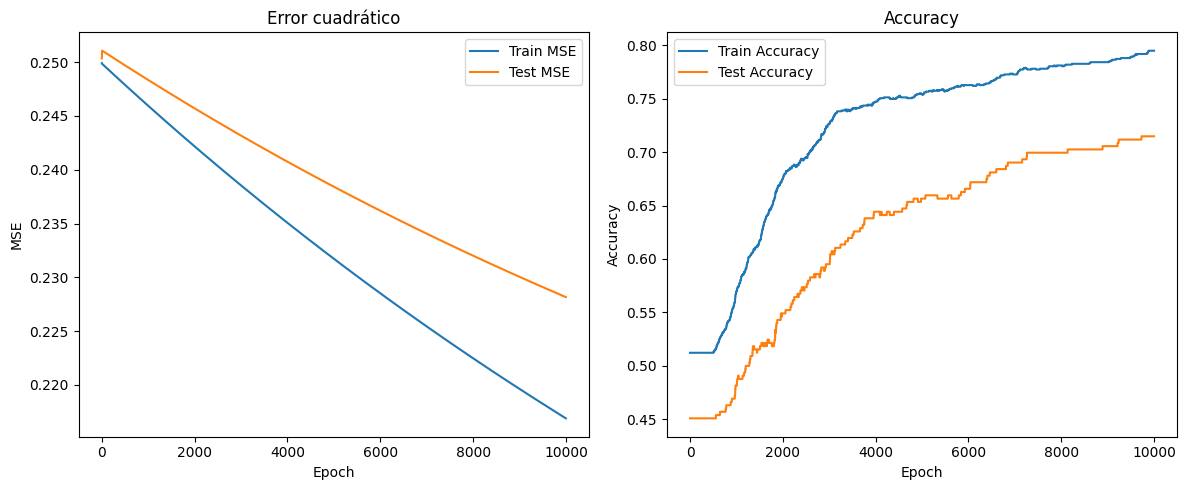

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(train_mse_list, label='Train MSE')
plt.plot(test_mse_list, label='Test MSE')
plt.xlabel('Iteration')
plt.ylabel('MSE')
plt.legend()
plt.title('Error cuadrático')

plt.subplot(1, 2, 2)
plt.plot(train_acc_list, label='Train Accuracy')
plt.plot(test_acc_list, label='Test Accuracy')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy')

plt.tight_layout()
plt.show()
